In [113]:
using Revise
using BilevelTrajOpt

using RigidBodyDynamics
using MeshCatMechanisms
using MeshCat
using ForwardDiff
using Plots

In [200]:
urdf = joinpath("..", "urdf", "panda", "panda_arm_plate.urdf")
mechanism = parse_urdf(Float64, urdf)
plate_body = findbody(mechanism, "panda_link8")
plate_frame = default_frame(plate_body)

mvis = MechanismVisualizer(mechanism, URDFVisuals(urdf));

# add frame vis to the plate
# setelement!(mvis, plate_frame);

In [204]:
# IJuliaCell(mvis)
open(mvis)

┌ Info: Serving MeshCat visualizer at http://127.0.0.1:8709
└ @ MeshCat /home/blandry/.julia/packages/MeshCat/jt9Xz/src/servers.jl:7
┌ Info: Listening on: Sockets.InetAddr{Sockets.IPv4}(ip"127.0.0.1", 0x2205)
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:301


Process(`xdg-open http://127.0.0.1:8709`, ProcessExited(0))

Created new window in existing browser session.


┌ Info: Accept (0):  🔗    0↑     0↓    0s 127.0.0.1:8709:8709 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:343
┌ Info: Accept (1):  🔗    0↑     0↓    0s 127.0.0.1:8709:8709 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:343
┌ Info: Accept (2):  🔗    0↑     0↓    0s 127.0.0.1:8709:8709 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:343
Error handling websocket connection:
WebSockets.WebSocketClosedError("ws|server respond to OPCODE_CLOSE 1001:Going Away")┌ Info: Closed (5):  💀    1↑     1↓🔒 333s 127.0.0.1:8708:8708 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351
┌ Info: Accept (3):  🔗    0↑     0↓    0s 127.0.0.1:8709:8709 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:343
┌ Info: Accept (4):  🔗    0↑     0↓    0s 127.0.0.1:8709:8709 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:343
┌ Info: Accept (5):  

In [202]:
settransform!(mvis["/Cameras/default/rotated"], MeshCat.Translation(-.25, -1.25, 0.075) 
    ∘ MeshCat.LinearMap(MeshCat.RotX(π/2))
    ∘ MeshCat.LinearMap(MeshCat.RotY(2*π/5)) 
)

MeshCat Visualizer with path /Cameras/default/rotated

In [ ]:
widget = manipulate!(mvis)

In [4]:
# traj opt without robustness

env = parse_contacts(mechanism, urdf, [])
x0 = MechanismState(mechanism)
Δt = 0.05
N = 20
traj_data = get_traj_data(mechanism,env,Δt,N,false,min_τ=false,min_v=true)

x_start = zeros(traj_data.num_q+traj_data.num_v)
x_goal = zeros(traj_data.num_q+traj_data.num_v)

x_start[1] = 0
x_start[2] = pi/4
x_start[3] = pi
x_start[4] = -3*pi/4
x_start[6] = -pi
x_goal[1] = -pi
x_goal[2] = -pi/4
x_goal[3] = pi
x_goal[4] = -pi/4
x_goal[6] = -pi

add_state_eq!(traj_data, xi -> xi - x_start, 1)
add_state_eq!(traj_data, xi -> xi - x_goal, N)
# note that the traj opt minimizes velocity too

traj = BilevelTrajOpt.trajopt_snopt(traj_data)

traj_t = vcat(0.,cumsum([Δt for i in 1:N-1]));
traj_q = [traj[1:num_positions(mechanism),i] for i in 1:N]
setanimation!(mvis, traj_t, traj_q)

┌ Info: Accept (3):  🔗    0↑     0↓    3s 127.0.0.1:8700:8700 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:343
┌ Warning: `a::Number + b::AbstractArray` is deprecated, use `a .+ b` instead.
│   caller = +(::Int64, ::Int64, ::UnitRange{Int64}) at operators.jl:502
└ @ Base ./operators.jl:502
┌ Warning: `a::Number + b::AbstractArray` is deprecated, use `a .+ b` instead.
│   caller = traj_fn_snopt(::BilevelTrajOpt.TrajData) at trajopt_snopt.jl:143
└ @ BilevelTrajOpt /home/blandry/.julia/dev/BilevelTrajOpt/src/trajopt_snopt.jl:143


Finished successfully: optimality conditions satisfied


┌ Info: Closed (3):  💀    0↑     0↓🔒 122s 127.0.0.1:8700:8700 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351
┌ Info: Closed (2):  💀    0↑     0↓🔒 122s 127.0.0.1:8700:8700 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351
┌ Info: Accept (4):  🔗    0↑     0↓    0s 127.0.0.1:8700:8700 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:343
┌ Warning: `wait(t::Task)` is deprecated, use `fetch(t)` instead.
│   caller = macro expansion at task.jl:265 [inlined]
└ @ Core ./task.jl:265


In [199]:
setanimation!(mvis, traj_t, traj_q)

┌ Info: Closed (1):  💀    1↑     1↓🔒 322s 127.0.0.1:8705:8705 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351
┌ Info: Closed (0):  💀    3↑     3↓🔒 322s 127.0.0.1:8705:8705 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351
Error handling websocket connection:
WebSockets.WebSocketClosedError("ws|server respond to OPCODE_CLOSE 1001:Going Away")┌ Info: Closed (2):  💀    1↑     1↓🔒 183s 127.0.0.1:8707:8707 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351
┌ Info: Closed (3):  💀    3↑     3↓🔒 115s 127.0.0.1:8707:8707 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351
┌ Info: Closed (4):  💀    3↑     3↓🔒 115s 127.0.0.1:8707:8707 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351


In [5]:
# robust version adds a "worst case scenario" computation for "wind gust" on the plate

world_frame = root_frame(mechanism)
function c_wind(q::AbstractArray{T}) where T
    state = MechanismState{T}(mechanism)
    set_configuration!(state, q)
    trans = relative_transform(state, plate_frame, world_frame)
    pn = (trans.mat * [0.,0.,1.,0.])[1:3]
    
    fw = w -> 100. * pn'*w
    hw = w -> [0.]
    gw = w -> vcat(w'*w - 1., w[3]*w[3] - 0.01)
    w0 = zeros(3)
    λ0 = zeros(1)
    μ0 = zeros(2)
    
    wsol,λsol,μsol = auglag_solve(w0,λ0,μ0,fw,hw,gw,in_place=false)

    fw(wsol)^2
end

traj_data = get_traj_data(mechanism,env,Δt,N,false,min_τ=false,min_v=true)

x_start = zeros(traj_data.num_q+traj_data.num_v)
x_goal = zeros(traj_data.num_q+traj_data.num_v)

x_start[1] = 0
x_start[2] = pi/4
x_start[3] = pi
x_start[4] = -3*pi/4
x_start[6] = -pi
x_goal[1] = -pi
x_goal[2] = -pi/4
x_goal[3] = pi
x_goal[4] = -pi/4
x_goal[6] = -pi

add_state_eq!(traj_data, xi -> xi - x_start, 1)
add_state_eq!(traj_data, xi -> xi - x_goal, N)
# note that the traj opt minimizes velocity too
for i = 2:N-1
    add_fn_obj!(traj_data, c_wind, i)
end

traj_robust = BilevelTrajOpt.trajopt_snopt(traj_data, opt_tol=1e-3)

traj_robust_t = vcat(0.,cumsum([Δt for i in 1:N-1]));
traj_robust_q = [traj_robust[1:num_positions(mechanism),i] for i in 1:N]
setanimation!(mvis, traj_robust_t, traj_robust_q)

Finished successfully: optimality conditions satisfied


┌ Info: Closed (1):  💀    1↑     1↓🔒 476s 127.0.0.1:8700:8700 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351


In [203]:
setanimation!(mvis, traj_robust_t, traj_robust_q)

┌ Info: Closed (0):  💀    3↑     3↓🔒 349s 127.0.0.1:8706:8706 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351
┌ Info: Closed (1):  💀    1↑     1↓🔒 349s 127.0.0.1:8706:8706 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351
┌ Info: Closed (0):  💀    3↑     3↓🔒 330s 127.0.0.1:8707:8707 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351
┌ Info: Closed (1):  💀    1↑     1↓🔒 330s 127.0.0.1:8707:8707 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351
┌ Info: Closed (3):  💀    3↑     3↓🔒 115s 127.0.0.1:8708:8708 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351
┌ Info: Closed (4):  💀    3↑     3↓🔒 115s 127.0.0.1:8708:8708 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351
┌ Info: Closed (1):  💀    1↑     1↓🔒 316s 127.0.0.1:8708:8708 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351

In [6]:
# compute the disturbance along each trajectory (the one our solver used)

# with our solver
function compute_dist(q::AbstractArray{T}) where T
    state = MechanismState{T}(mechanism)
    set_configuration!(state, q)
    trans = relative_transform(state, plate_frame, world_frame)
    pn = (trans.mat * [0.,0.,1.,0.])[1:3]
    
    fw = w -> 100. * pn'*w
    hw = w -> [0.]
    gw = w -> vcat(w'*w - 1., w[3]*w[3] - 0.01)
    w0 = zeros(3)
    λ0 = zeros(1)
    μ0 = zeros(2)
    
    wsol,λsol,μsol = auglag_solve(w0,λ0,μ0,fw,hw,gw,in_place=false)
    fw(wsol)^2
end

traj_dist = zeros(N)
traj_robust_dist = zeros(N)
for i = 1:N
    traj_dist[i] = compute_dist(traj_q[i])
    traj_robust_dist[i] = compute_dist(traj_robust_q[i])
end

┌ Info: Closed (0):  💀    3↑     3↓🔒 366s 127.0.0.1:8700:8700 ≣16
└ @ HTTP.Servers /home/blandry/.julia/packages/HTTP/YjRCz/src/Servers.jl:351


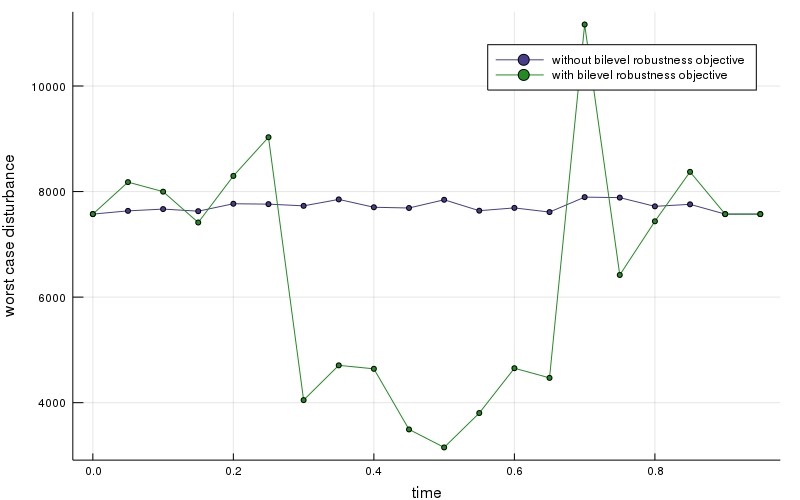

In [7]:
gr(size=(800,500), html_output_format=:png, seriescolor=:magma);
plot(traj_t,traj_dist,label="without bilevel robustness objective",
    seriescolor=:darkslateblue,marker=3)
plot!(traj_robust_t,traj_robust_dist,label="with bilevel robustness objective",
    seriescolor=:forestgreen,xlabel="time",ylabel="worst case disturbance",
    marker=3)

In [8]:
# with snopt directly (i.e. the "true" non-differentiable disturbance)

function compute_dist_snopt(q::AbstractArray{T}) where T
    state = MechanismState{T}(mechanism)
    set_configuration!(state, q)
    trans = relative_transform(state, plate_frame, world_frame)
    pn = (trans.mat * [0.,0.,1.,0.])[1:3]
    
    fw = w -> 100. * pn'*w
    gw = w -> vcat(w'*w - 1., w[3]*w[3] - 0.01)
    function snopt_fn(w)
        J = fw(w)
        gJ = ForwardDiff.gradient(fw,w)
        
        c = gw(w)
        gc = ForwardDiff.jacobian(gw,w)
    
        fail = false
    
        J, c, gJ, gc, fail
    end
    
    w0 = zeros(3)
    lb = -1e19*ones(3)
    ub = 1e19*ones(3)
    options = Dict{String, Any}()
    options["Derivative option"] = 1
    options["Verify level"] = -1
    options["Major optimality tolerance"] = 1e-6
    wsol, fsol, info = snopt(snopt_fn, w0, lb, ub, options)

    fw(wsol)^2
end

traj_dist_snopt = zeros(N)
traj_robust_dist_snopt = zeros(N)
for i = 1:N
    traj_dist_snopt[i] = compute_dist_snopt(traj_q[i])
    traj_robust_dist_snopt[i] = compute_dist_snopt(traj_robust_q[i])
end

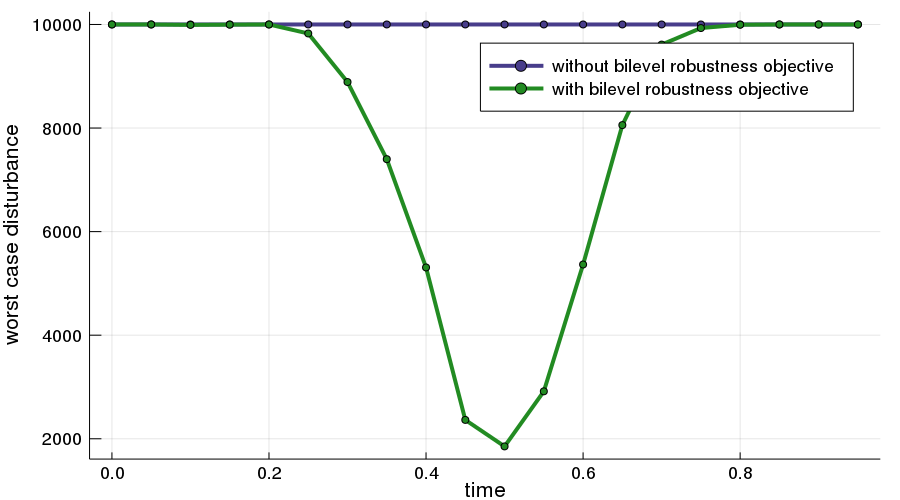

In [26]:
tickfont = font(12)
legendfont = font(12)
guidefont = font(14)
clibrary(:Plots)
gr(size=(900,500), html_output_format=:png, seriescolor=:magma, xtickfont=tickfont,
    ytickfont=tickfont,legendfont=legendfont,guidefont=guidefont,linewidth=4);

plot(traj_t,traj_dist_snopt,label="without bilevel robustness objective",
    seriescolor=:darkslateblue,marker=4)
plot!(traj_robust_t,traj_robust_dist_snopt,label="with bilevel robustness objective",
    seriescolor=:forestgreen,xlabel="time",ylabel="worst case disturbance",marker=4)

In [27]:
savefig("figures/robust_snopt.svg")

In [ ]:
# playing with noise models

fw_ = (w,pn) -> 100. * pn'*w
hw = w -> [0.]
gw = w -> vcat(w'*w - 1., w[3]*w[3] - 0.01)

function compute_dist(q::AbstractArray{T}) where T
    state = MechanismState{T}(mechanism)
    set_configuration!(state, q)
    trans = relative_transform(state, plate_frame, world_frame)
    pn = (trans.mat * [0.,0.,1.,0.])[1:3]
    
    fw = w -> fw_(w,pn)
    w0 = zeros(3)
    λ0 = zeros(1)
    μ0 = zeros(2)
    
    wsol,λsol,μsol = auglag_solve(w0,λ0,μ0,fw,hw,gw,in_place=false,num_fosteps=1,num_sosteps=9)

    wsol
end

function compute_dist_snopt(q::AbstractArray{T}) where T
    state = MechanismState{T}(mechanism)
    set_configuration!(state, q)
    trans = relative_transform(state, plate_frame, world_frame)
    pn = (trans.mat * [0.,0.,1.,0.])[1:3]

    fw = w -> fw_(w,pn)
    function snopt_fn(w)
        J = fw(w)
        gJ = ForwardDiff.gradient(fw,w)
        
        c = gw(w)
        gc = ForwardDiff.jacobian(gw,w)
    
        fail = false
    
        J, c, gJ, gc, fail
    end
    
    w0 = zeros(3)
    lb = -1e19*ones(3)
    ub = 1e19*ones(3)
    options = Dict{String, Any}()
    options["Derivative option"] = 1
    options["Verify level"] = -1
    options["Major optimality tolerance"] = 1e-6
    wsol, fsol, info = snopt(snopt_fn, w0, lb, ub, options)

    wsol
end

q = configuration(mvis.state)
display(compute_dist(q))
display(compute_dist_snopt(q))

In [ ]:
widget = manipulate!(mvis)